In [ ]:
#2차원 배열에서 랜덤한 순서로 이웃된 두 요소들을 연결시켜 클러스터를 만들때,
#스텝마다 가장 큰 클러스터의 크기를 구한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 함수

In [2]:
def local(L,i):
  N = L*L
  right = i+1-L*(i%L==L-1)
  left = i-1+L*(i%L==0)
  up = i-L+N*(i//L==0)
  down = i+L-N*(i//L==L-1)
  return np.array([right,up,left,down])

In [3]:
def find_root(ptr, idx):
  idx = int(idx)
  if ptr[idx] < 0:
    return [idx, ptr[idx]]
  else:
    return find_root(ptr, ptr[idx])

## 작은 L을 이용해서 해보기

In [4]:
big_list=[]

L=20

order = np.random.permutation(np.arange(L*L))
ptr = np.ones(L*L)*(-L*L-1)

for i in order:
  i_idx, ptr[i]= i, -1 #비어있던 칸을 -1로 지정

  root1_idx, root1_value = i, -1 #지금 생긴 이 칸을 포함한 크러스터의 크기는 1

  for j in local(L,i):
    if ptr[j] != (-L*L-1): #이웃칸이 비어있지 않은 경우

      if find_root(ptr,j)[0] != find_root(ptr,i)[0]:# 이미 같은 클러스터에 있지 않은 경우 연결

        if find_root(ptr,j)[1] < find_root(ptr,i)[1]: #크기가 더 큰 클러스터에 작은 클러스터가 합쳐진다.
          a,b = find_root(ptr,i)
          c = find_root(ptr,j)[0]
          ptr[a] = c
          ptr[c] += b
          i = j
        else:
          a,b = find_root(ptr,j)
          c = find_root(ptr,i)[0]
          ptr[a] = c
          ptr[c] += b

  # for k in range(len(ptr)):
  #   if ptr[k] > 0:
  #     ptr[k] = find_root(ptr,k)[0]
#  print(ptr.reshape(L,L),end='\n\n')

  find_big = ptr.copy()
  find_big[find_big  < -L*L] = 0
#  print(min(find_big))
  big_list.append(min(find_big)*-1)

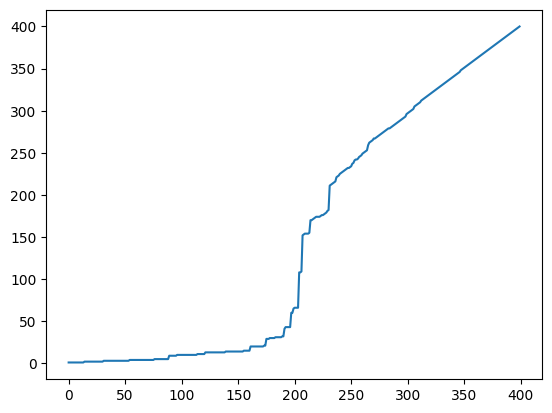

In [5]:
plt.plot(big_list)

## 함수화

In [9]:
def find_big_percolation(L):
  big_list=[]

  order = np.random.permutation(np.arange(L*L))
  ptr = np.ones(L*L)*(-L*L-1)

  for i in order:
    i_idx, ptr[i]= i, -1
    root1_idx, root1_value = i, -1

    for j in local(L,i):
      if ptr[j] != (-L*L-1):
        if find_root(ptr,j)[0] != find_root(ptr,i)[0]:

          if find_root(ptr,j)[1] < find_root(ptr,i)[1]:
            a,b = find_root(ptr,i)
            c = find_root(ptr,j)[0]
            ptr[a] = c
            ptr[c] += b
            i = j
          else:
            a,b = find_root(ptr,j)
            c = find_root(ptr,i)[0]
            ptr[a] = c
            ptr[c] += b

    # for k in range(len(ptr)):
    #   if ptr[k] > 0:
    #     ptr[k] = find_root(ptr,k)[0]

    find_big = ptr.copy()
    find_big[find_big  < -L*L] = 0
    big_list.append(min(find_big)*-1)

  return big_list

## 실행, 결과



In [ ]:
#L을 변화시킴에 따라 달라지는 결과들으 비교한다.

0,1,2,3,4,5,6,7,8,9,.
CPU times: user 400 ms, sys: 17.2 ms, total: 417 ms
Wall time: 405 ms


Text(0.5, 1.0, 'site percolation')

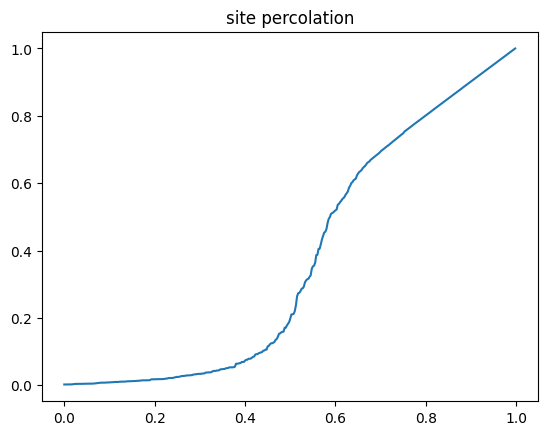

In [10]:
%%time

# L=20배열의 10번의 평균
t,L = 10,20

big_l_list=[]
for i in range(t):
  print(i,end=',')
  big_l_list.append(find_big_percolation(L))
print('.')
big_l_list = np.array(big_l_list)
result = (big_l_list.sum(axis=0))/t

plt.plot(np.arange(L*L)/(L*L),result/(L*L))
plt.title('site percolation')

0,1,2,3,4,5,6,7,8,9,.
CPU times: user 1min 36s, sys: 250 ms, total: 1min 37s
Wall time: 1min 38s


Text(0.5, 1.0, 'site percolation')

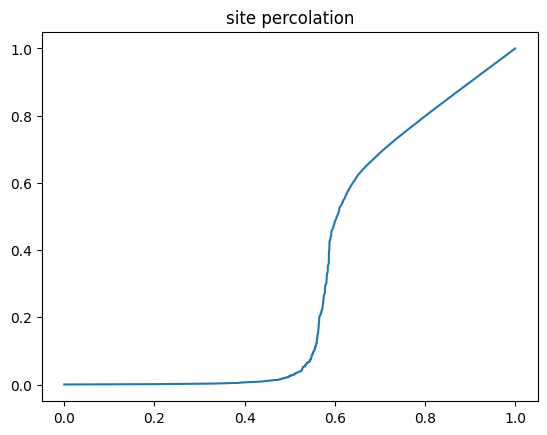

In [11]:
%%time

# L=100배열의 10번의 평균
t,L = 10,100

big_l_list=[]
for i in range(t):
  print(i,end=',')
  big_l_list.append(find_big_percolation(L))
print('.')
big_l_list = np.array(big_l_list)
result = (big_l_list.sum(axis=0))/t

plt.plot(np.arange(L*L)/(L*L),result/(L*L))
plt.title('site percolation')

0,1,2,3,.
CPU times: user 9min 55s, sys: 1.29 s, total: 9min 56s
Wall time: 10min 2s


Text(0.5, 1.0, 'site percolation')

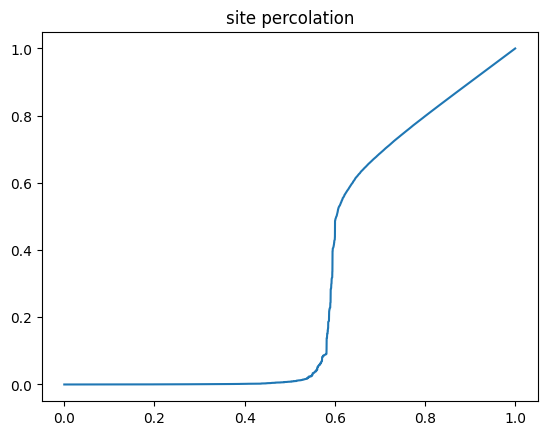

In [15]:
%%time

# L=200배열의 4번의 평균
t,L = 4,200

big_l_list=[]
for i in range(t):
  print(i,end=',')
  big_l_list.append(find_big_percolation(L))
print('.')
big_l_list = np.array(big_l_list)
result = (big_l_list.sum(axis=0))/t

plt.plot(np.arange(L*L)/(L*L),result/(L*L))
plt.title('site percolation')